# ECE 473 Assignment 8 Exercise

Your Name:

For this assignment, you will explore various density estimation methods.

## Exercise 1: Density estimation in 1D (60/100 points)
In this exercise, you will write code to estimate 1D densities.
Specifically, you will write code to estimate a Gaussian density, a histogram density, and a kernel density.

### Task 1.1: Gaussian density (20/100 points)
For this first one you will estimate a Gaussian density via MLE.
As discussed in class, this simplifies to estimating the mean and standard deviation of the data and using these empirical estimates for the Gaussian distribution.
The Gaussian PDF can be evaluated using the function [`scipy.stats.norm.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Do not change the numpy random seed.

In [34]:
import numpy as np
import scipy.stats
from sklearn.base import BaseEstimator
np.random.seed(42)
class GaussianDensity(BaseEstimator):
    def fit(self, X, y=None):
        ##### Your code here #####
        # You should estimate the mean and std of the data  and save as self.mean_ and self.std_
        # (note that X will be shape (n,1) because there is only 1 feature).
        self.mean_ = np.mean(X)
        self.std_ = np.std(X)
        ##########################
        return self

    def predict_proba(self, X):
        ##### Your code here #####
        # This should return the PDF values for each sample in X (again of shape (n, 1))
        # This should use your self.mean_ and self.std_ variables saved from the fit method'
        pdf_values = np.zeros(len(X))
        for i, x in enumerate(X):
          pdf_values[i] = scipy.stats.norm.pdf(x, self.mean_, self.std_)


        return pdf_values.reshape((-1,))  # Output should be of shape (n,), i.e., a 1D array
        ##########################

### Task 1.2: Histogram density (20/100 points)
Now you will implement a histogram density estimate given min, max and number of bins.
The function [`np.searchsorted`](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html) may be useful but is not required. Additional instructions are inline in the code template below.

In [35]:
import numpy as np
import scipy.stats
from sklearn.base import BaseEstimator
np.random.seed(42)
class HistogramDensity(BaseEstimator):
    def __init__(self, n_bins, min_val, max_val):
        self.n_bins = n_bins
        self.min_val = min_val
        self.max_val = max_val

    def fit(self, X, y=None):
        ##### Your code here #####
        # First create equally spaced bin_edges based on min_val, max_val and n_bins
        #  and save as self.bin_edges_
        #  (note the shape of self.bin_edges_ should be (n_bins+1,) )
        # Second, estimate the frequency for each bin based on the input data X
        #  (i.e., the number of training samples that fall into that bin divided
        #  by the total number of samples)
        # Third, using the probability for each bin, compute the density value (i.e., PDF) for
        #  each bin. (Note you will have to account for the width of the bin to ensure
        #  that integrating your density function from min_value to max_value will be 1).
        #  Save the density per bin as self.pdf_per_bin_ which should have the shape (n_bins,)
        bin_size = (self.max_val - self.min_val) / self.n_bins
        self.bin_edges_ = np.linspace(self.min_val, self.max_val, self.n_bins + 1)

        histogram, _ = np.histogram(X, bins=self.bin_edges_)  # histogram is the number of items in each bin
                                                              # i.e. 0th bin=20, 1st bin=13, etc.

        self.pdf_per_bin_ = histogram / (np.sum(histogram) * bin_size)

        ##########################
        return self

    def predict_proba(self, X):
        ##### Your code here #####
        # You should return the PDF value of the samples X.  This requires finding out which
        #  bin each sample falls into and returning it's corresponding density value
        #  **Importantly, if the value is less than min_value or greater than max_value,
        #    then a pdf value of 0 should be returned.
        pdf_values = np.zeros(len(X))
        indices = np.searchsorted(self.bin_edges_, X)

        valid_ind = (indices > 0) & (indices < len(self.pdf_per_bin_) + 1)
        valid_ind = np.where(valid_ind)[0]
        pdf_values[valid_ind] = self.pdf_per_bin_[indices[valid_ind] - 1].reshape((-1,))

        return pdf_values  # Output should be of shape (n,), i.e., a 1D array
        ##########################

### Task 1.3: Kernel density (20/100 points)
Now you will implement a kernel density estimate (KDE) via a Gaussian kernel given the bandwidth parameter (i.e., the standard deviation of the Gaussian kernel.
Specifically, the Gaussian kernel density is given by:
$$p(x; \mathcal{D}) = \frac{1}{n}\sum_{i=1}^n p_{\mathcal{N}}(x; \mu = x_i, \sigma=h) $$
where $\mathcal{D}=\{x_i\}_{i=1}^n$ is a training dataset of $n$ samples, $p_{\mathcal{N}}$ is the Gaussian/normal density function and $h$ is called the bandwidth hyperparameter of the KDE model.
(Note that fitting merely requires saving the training dataset. The saved training data is then used at test time to compute the densities of new samples.)

In [36]:
import numpy as np
import scipy.stats
from sklearn.base import BaseEstimator
np.random.seed(42)
class KernelDensity(BaseEstimator):
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth

    def fit(self, X, y=None):
        ##### Your code here #####
        # Save the training data in self.X_train_
        self.X_train_ = X
        ##########################
        return self

    def predict_proba(self, X):
        ##### Your code here #####
        # You should return the KDE PDF value of the samples X.
        #  Note that the mean above is over the TRAINING samples, not the test samples
        #  so you should use the samples saved by the fit method.
        pdf_values = np.zeros(len(X))

        for i, x in enumerate(X):
          kernel = scipy.stats.norm.pdf(x, self.X_train_, self.bandwidth)
          pdf_values[i] = np.mean(kernel)

        return pdf_values.reshape((-1,))  # Output should be of shape (n,), i.e., a 1D array
        ##########################

You must run the testing code below for your density estimators.

(200, 1) (200, 1)
Fitting GaussianDensity model
True, Shape=(1000,) - Is the output the correct shape?
True, Num neg=0 - Are all pdf values >= 0? 
quad_out=0.9999916379946465

Fitting HistogramDensity model
True, Shape=(1000,) - Is the output the correct shape?
True, Num neg=0 - Are all pdf values >= 0? 
quad_out=1.0000260507608276

Fitting KernelDensity model


<ipython-input-34-962ecc97bacc>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf_values[i] = scipy.stats.norm.pdf(x, self.mean_, self.std_)


True, Shape=(1000,) - Is the output the correct shape?
True, Num neg=0 - Are all pdf values >= 0? 
quad_out=1.0



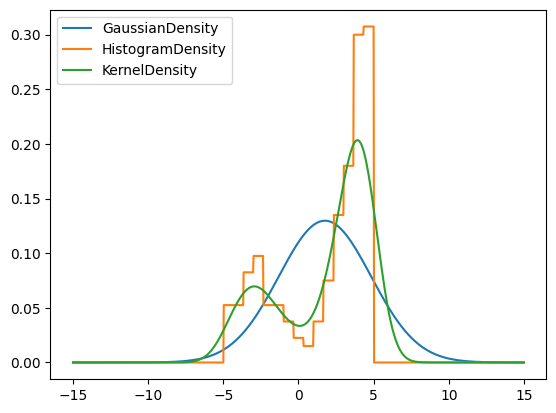

In [37]:
# %pdb on
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Generate some data and split into train and test
np.random.seed(42) # Fix random seed
min_val, max_val = -5, 5
diff = max_val - min_val
X = diff * np.vstack([scipy.stats.beta(6,1).rvs(size=(300,1)), scipy.stats.beta(2,7).rvs(size=(100,1))]) - diff/2
X_train, X_test = train_test_split(X, test_size=0.5, random_state=15)
print(X_train.shape, X_test.shape)

# Loop through models
models = [GaussianDensity(),
          HistogramDensity(n_bins=15, min_val=min_val, max_val=max_val),
          KernelDensity(bandwidth=1)
         ]
for model in models:
    print(f'Fitting {type(model).__name__} model')
    # Fit models
    model.fit(X_train)

    # Sanity checks
    xq = np.linspace(min_val-diff, max_val+diff, num=1000)
    pdf_vals = model.predict_proba(xq.reshape(-1, 1))
    # Check that right size and >= 0
    print(f'{len(pdf_vals.shape) == 1 and pdf_vals.shape[0] == len(xq)}, Shape={pdf_vals.shape}'
          f' - Is the output the correct shape?')
    print(f'{np.all(pdf_vals>=0)}, Num neg={np.sum(pdf_vals < 0)} - Are all pdf values >= 0? ')

    # Check that integrates to 1 vai approximate numerical integration
    model_pdf = lambda x: model.predict_proba(np.array(x).reshape(1,1))[0]
    quad_out = scipy.integrate.quad(model_pdf, min_val - diff, max_val + diff, limit=100, full_output=True)
    # print(f'{np.abs(quad_out[0] - 1) < 1e-4}, quad_out={quad_out[0]} - Does the PDF integrate to 1? ')
    print(f'quad_out={quad_out[0]}')
    print('')

    # Plot density model
    plt.plot(xq, pdf_vals, label=type(model).__name__)

plt.legend()

## Exercise 2: Determine optimal hyperparameters based on 10-fold cross validation (40/100 points)
In this exercise, you need to write code that will use your estimators from above to automatically choose the best hyperparameters for the histogram and kernel density estimator.  In particular, find the best `n_bins` and `bandwidth` for the histogram and KDE respectively.


### Task 1: Implement custom scorer function for use in GridSearchCV (20/100 points)
To do this, you will need to implement a `scorer` function that will compute the log likelihood of the data given (higher is better).
This function takes in the model, the input data X and y_true (which defaults to None since this is an unsupervised problem and can be ignored).

Since we are computing the log of probabilities, we have to be careful on the case where the probability for a certain sample is zero, since the log(0) is negative infinity. And this phenomenon can happen when we use more and more bins to approximate the density with Histogram density model(Consider the case where the original density value is small for a certain range of x, and when we do sampling on the distribution, there is a high likelihood that none of the sampled points fall into that range, i.e the probability bin will have 0 height on that range).

One easy way to overcome this issue is to add a small number epsilon (e.g 1e-15) on the probability value that is 0. The code might look like this:
`pdf_vector[pdf_vector < lam] = lam # where lam is a small value like 1e-15`

In [38]:
def mean_log_likelihood_scorer(model, X, y_true=None, lam=1e-15):
    ########## Your code here ########
    # Compute and return the mean log probability of the data
    #  (Note y_true is not used)
    pdf_vector = model.predict_proba(X)

    pdf_vector[pdf_vector < lam] = lam
    mean_log_val = np.mean(np.log(pdf_vector))

    ##########################
    return mean_log_val

### Task 2: Estimate best hyperparameters (20/100 points)
Now you need to implement the `estimate_param` function. It takes in the density model, train and test dataset, parameter searching grid, model evaluation function and the number of folds for cross validaiton, and outputs the grid search result and the score on the test dataset. It uses sklearn's cross validation utilities to cross validate using the training data to determine the best parameters. You should implement grid search on the train dataset to get the model with the best parameter (note for `scoring` argument, you just pass `score_function` directly without the parenthesis; this is known as passing a function to another function) and then calculate the score on the test dataset based on the best model.

After implementing the `estimate_param` function, you should call the function with the correct inputs.

For the `score_function` argument, you need to use the `mean_log_likelihood_scorer`.

For this part, you want to estimate `n_bins` for `HistogramDensity`. You should try 2-20 number of bins.

You should use 10 fold cross validation. Extract `n_bins` from the grid search results as the `best_n_bins`.

Finally, print out the optimal hyperparameters and, using the optimal hyperparameters, print out the log likelihood of the test data for both the histogram and KDE model.

The expected output for $n\_bins$ estimation should be (you need to get the same result to get full credits):

~~~
The best parameter given for n_bins is 6
Log-likelihood for test data is -1.886976453776378
~~~

In [39]:
from sklearn.model_selection import GridSearchCV

def estimate_param(X_train, X_test, density_model, param_grid, score_function, cv):
  """
  Complete this function by using the GridSearchCV to search for the best parameter within the grid
  Inputs:
    X_train: training data
    X_test: testing data
    density_model: the density estimation function
    param_grid: a dictionary of the searching grid
    score_function: a function that evaluates the model on a dataset
    cv: number of folds for cross validation
  Output:
    grid_search_cv: the estimator after fitting on the training data
    test_log_likelihood: the log-likelihood of test set using the best number of bins
  """
  ############ Your code here #############
  grid_search_cv = GridSearchCV(density_model, param_grid, scoring=score_function, cv=cv)
  grid_search_cv.fit(X_train)

  test_log_likelihood = score_function(grid_search_cv, X_test)

  #########################################
  return grid_search_cv, test_log_likelihood

# Call the estimation function with the desired parameters
#  and extract the best number of bins selected by CV
np.random.seed(42) # Fix random seed

############ Your code here #############
grid_param = {'n_bins' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

grid_search, test_log_likelihood = estimate_param(X_train, X_test, HistogramDensity(n_bins=10, min_val=min_val, max_val=max_val), grid_param, mean_log_likelihood_scorer, 10)

best_n_bins = grid_search.best_params_
#########################################

print(f"The best parameter given for n_bins is {best_n_bins}")
print(f"Log-likelihood for test data is {test_log_likelihood}")

The best parameter given for n_bins is {'n_bins': 6}
Log-likelihood for test data is -1.8869764537763773


For this part, you want to estimate `bandwidth` for `KernelDensity`. You should try 50 bandwidth parameters linearly spaced between 0.1 and 10.

You should use 10 fold cross validation. Extract `bandwidth` from the grid search results as the `best_bandwidth`.

The expected output for $bandwidth$ estimation should be  (you need to get the same result to get full credits):

~~~
The best parameter given for bandwidth is 0.3020408163265306
Log-likelihood for test data is -1.9436632867557484
~~~

In [40]:
# Call the estimation function with the desired parameters
#  and extract the best bandwidth as selected by CV
np.random.seed(42) # Fix random seed
############ Your code here #############
grid_param = {'bandwidth' : np.linspace(0.1, 10, num=50)}
search, test_log_likelihood = estimate_param(X_train, X_test, KernelDensity(10), grid_param, mean_log_likelihood_scorer, 10)
best_bandwidth = search.best_params_['bandwidth']
#########################################

print(f"The best parameter given for bandwidth is {best_bandwidth}")
print(f"Log-likelihood for test data is {test_log_likelihood}")

The best parameter given for bandwidth is 0.3020408163265306
Log-likelihood for test data is -1.9436632867557484
